In [1]:
#This file applies the trained model to the data which conatains only the data from Starbucks, McDonald's and Dunkin'

import joblib
import import_ipynb
import sys
sys.path.append('../')
from Preprocessing import Train_Test_split as ts
import matplotlib.pyplot as plt
import json
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


Training data shape: (452068, 3)
Test data shape: (113018, 3)
Training samples: 361654, Validation samples: 90414, Test samples: 113018


In [3]:
# Load the vectorizer and model
vectorizer = joblib.load('BOW\\tfidf_vectorizer.joblib')
model = joblib.load('BOW\\logreg_bow_model.joblib')

In [4]:
# Example: Transform new data and predict
X_new_vec = vectorizer.transform(ts.BI_df['text'])
y_new_pred = model.predict(X_new_vec)

In [5]:
X_new_vec

<21575x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 706213 stored elements in Compressed Sparse Row format>

In [6]:
y_new_pred

array([1, 3, 3, ..., 1, 3, 3], dtype=int64)

In [7]:
ts.BI_df["bow_predicted_sentiment"] = y_new_pred
ts.BI_df

C:\Users\gunja\AppData\Local\Temp\ipykernel_20356\2073490316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.BI_df["bow_predicted_sentiment"] = y_new_pred


,user_id,business_id,stars,useful,funny,cool,text,date,name,review_count,categories,address,city,state,postal_code,sentiment,roberta_score,stars_3_scale,bow_predicted_sentiment
31,veBX5roHQLNnQ1rTtNh_gg,aJvxWyQIG5OLfBw3qAe8xA,2,0,0,0,"Ordered Caramel frappe at Drive thru, BIG MIST...",2017-12-29 19:38:31,Starbucks,65,"Restaurants, Coffee & Tea, Food",2308 Murfreesboro Pike,Nashville,TN,37217,Neutral,2,1,1
46,zZygOZLNyJX5nDqKrwa4HQ,MjZQqZAmJeMco_Vq-Y9h-g,4,0,0,0,Drum-roll please! Review #100 coming right up!...,2014-02-05 19:38:24,Starbucks,33,"Food, Coffee & Tea",13170 North Hazel Dell Pkwy,Carmel,IN,46033,Positive,3,3,3
54,0SpK7eVn5TrpyQKPaohVBw,u7MJKcNdZXYyTeb67vD5jw,4,1,0,0,We stopped here for my Chai and Hubby's coffee...,2017-02-09 04:35:39,Starbucks,17,"Food, Coffee & Tea",5 Hartford Rd,Mount Laurel,NJ,08054,Positive,3,3,3
89,IVnrNZ8npRx04jkNp6-ERA,saJFbz12EnzanelpD8_xXQ,2,0,0,0,There's been three times that I've ordered a g...,2016-08-25 14:08:18,Starbucks,95,"Food, Coffee & Tea",10716 Big Bend Rd,Riverview,FL,33579,Neutral,2,1,3
104,tgP2gKsf3O9MyuLuolv2oQ,KiE0h68HGOO7ZXAqkMBdiw,1,0,1,0,"I went in when they had 4 people working, wait...",2016-01-30 01:10:42,Starbucks,35,"Food, Coffee & Tea",1015 De La Vina St,Santa Barbara,CA,93101,Negative,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586567,QPDFn3SQqZeBu7OBI78g9w,-85kJMtb9wqNWDT8yLbitw,3,0,0,0,Fair service- messed up my drink cuppa times....,2021-12-13 22:08:14,Starbucks,34,"Food, Coffee & Tea","438 Main St, Space 168, Space 168",Franklin,TN,37064,Negative,1,2,1
586568,F3ELBqGgDCX9YEhz_oS0xQ,Ddg-J_j0YFErk7wpMtH_0A,5,3,1,4,On my way out of Reno last week I noted a new ...,2021-12-28 19:26:37,Starbucks,67,"Food, Coffee & Tea, Coffee Roasteries",986 Ambassador Dr,Reno,NV,89523,Positive,3,3,3
586638,TZJzzQsE4R7RmqkVRaLEKw,2rmpfdyV2POqpXtmPHO_IQ,1,0,0,0,always closing drive thru. i've driven here so...,2021-12-28 18:12:04,Starbucks,27,"Coffee & Tea, Food",6363 N La Cholla,Tucson,AZ,85741,Negative,1,1,1
586646,dvu83QWKsnnbGvNVQ3mv7A,GxuxCctcz3Hyk0wnuly7vQ,4,1,0,1,This is now one of two Starbucks in the shoppi...,2017-01-21 00:19:27,Starbucks,45,"Food, Coffee & Tea",4811 E Grant,Tucson,AZ,85712,Positive,3,3,3


In [15]:
df = df = ts.BI_df[(ts.BI_df["bow_predicted_sentiment"] == 1) & (ts.BI_df["roberta_score"] == 2)]
df = df[["text", "bow_predicted_sentiment", "roberta_score"]].head(10)
df.to_json('example_neutral.json', orient='records', lines=True)

In [7]:
ts.BI_df.to_json('BOW_predictions.json', orient='records', lines=True)

In [10]:
print(classification_report(ts.BI_df["roberta_score"], ts.BI_df['bow_predicted_sentiment']))

              precision    recall  f1-score   support

           1       0.87      0.91      0.89      8936
           2       0.53      0.05      0.09      1217
           3       0.89      0.94      0.92     11422

    accuracy                           0.88     21575
   macro avg       0.76      0.63      0.63     21575
weighted avg       0.86      0.88      0.86     21575



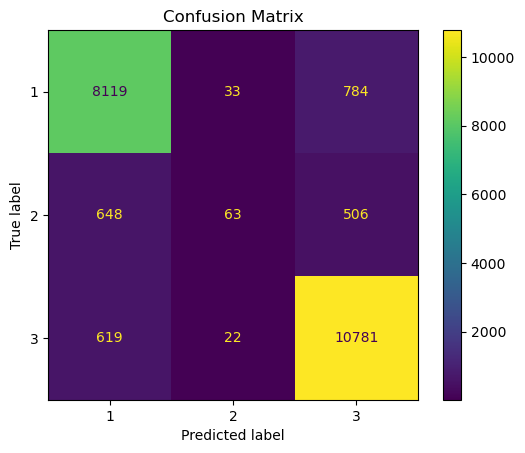

In [ ]:
ConfusionMatrixDisplay.from_predictions(ts.BI_df["roberta_score"], ts.BI_df['bow_predicted_sentiment'])
plt.title('Confusion Matrix')
plt.show()